<a href="https://colab.research.google.com/github/dongxiaohuang/Tensorflow2.0_notes/blob/main/tf2_models_api_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import numpy as np
import sklearn

In [2]:
tf.__version__

'2.4.1'

# MNIST dataset loader

In [3]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


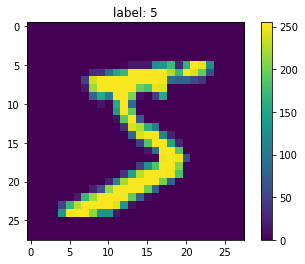

In [4]:
import matplotlib.pyplot as plt
def show_image(image, label):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.title(f'label: {label}')
    plt.show()
show_image(x_train[0], y_train[0])

In [5]:
# normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255  #把数值变成0-1之间的浮点数。
x_test /= 255

# show shapes
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# Sequential API v1

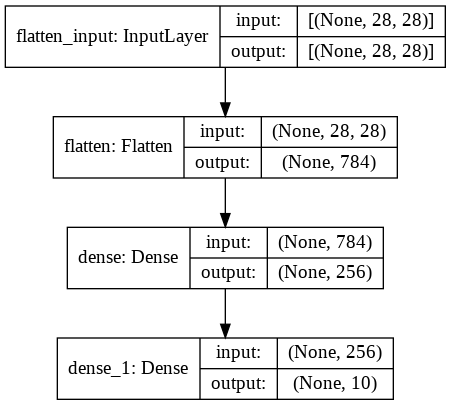

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

seq_model_v1 = Sequential([Flatten(input_shape=(28,28)),
                    Dense(256, 'relu'),
                    Dense(10, 'softmax')])

plot_model(seq_model_v1, show_shapes=True, show_layer_names=True, to_file='seq_model_v1.png')

In [7]:
seq_model_v1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
seq_model_v1.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3797 - accuracy: 0.8937
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0981 - accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0603 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0395 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0308 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0181 - accuracy: 0.9947
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [8]:
seq_model_v1.evaluate(x_test, y_test) # not only gives the loss, but also the specified accuracy metrics as defined in model.compile

313/313 [==============================] - 1s 1ms/step - loss: 0.0747 - accuracy: 0.9805


[0.07470017671585083, 0.9804999828338623]

In [9]:
seq_model_v1.predict(x_test)

array([[4.99838781e-10, 3.50131757e-10, 1.19096235e-08, ...,
        9.99999166e-01, 9.23314403e-09, 4.26036792e-07],
       [6.66729491e-15, 3.30870753e-05, 9.99966860e-01, ...,
        3.20912764e-20, 2.89539269e-12, 2.92000540e-20],
       [2.09203835e-10, 9.99958038e-01, 2.24249129e-06, ...,
        1.05133131e-06, 3.18045350e-05, 7.41051109e-11],
       ...,
       [1.09535243e-22, 1.60173573e-16, 4.69127376e-22, ...,
        4.18337413e-11, 1.68713182e-10, 1.02362463e-07],
       [9.61088674e-12, 2.30352728e-15, 1.37531985e-16, ...,
        1.46324909e-17, 7.46518083e-07, 6.68485475e-15],
       [3.47274593e-15, 2.89192558e-18, 1.83770362e-15, ...,
        2.04907727e-20, 4.50941961e-15, 7.12894185e-19]], dtype=float32)

# Sequence API v2

In [11]:
seq_model_v2 = Sequential()
seq_model_v2.add(Flatten(input_shape=(28,28)))
seq_model_v2.add(Dense(256, 'relu'))
seq_model_v2.add(Dense(10, 'softmax'))

seq_model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
seq_model_v2.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
 560/1875 [=======>......................] - ETA: 3s - loss: 0.6112 - accuracy: 0.8220

KeyboardInterrupt: ignored

In [ ]:
plot_model(seq_model_v2, show_shapes=True, show_layer_names=True, to_file='seq_model_v2.png')

In [ ]:
seq_model_v2.evaluate(x_test, y_test) # not only gives the loss, but also the specified accuracy metrics as defined in model.compile

In [ ]:
seq_model_v2.predict(x_test)

In [24]:
def predict_single_image_by_model(model, image):
  single_image_encode = tf.expand_dims(
      image, 0, name=None
  )
  prediction_digit = np.argmax(seq_model_v2.predict(single_image_encode))
  show_image(image, prediction_digit)

In [ ]:
predict_single_image_by_model(seq_model_v2, x_test[0])

# Functional API

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

inputs = Input(shape=(28,28))
x = Flatten()(inputs)
x = Dense(256, 'relu')(x)
outputs = Dense(10, 'softmax')(x)

func_model = Model(inputs=inputs, outputs=outputs)

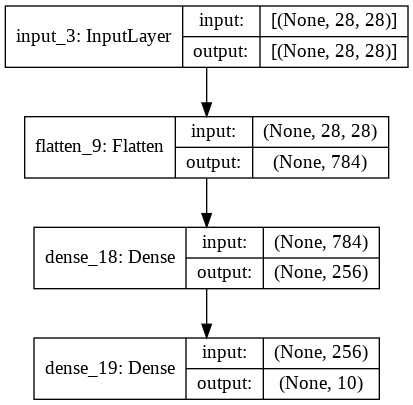

In [ ]:
plot_model(func_model, show_layer_names=True, show_shapes=True)

In [ ]:
func_model(x_test)

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0.06476841, 0.15882796, 0.08753388, ..., 0.10418176, 0.0987823 ,
        0.056632  ],
       [0.11976592, 0.09389384, 0.06432436, ..., 0.05270205, 0.09847891,
        0.06877186],
       [0.1033151 , 0.15686116, 0.08001517, ..., 0.06814651, 0.10594232,
        0.06730799],
       ...,
       [0.07548504, 0.20091365, 0.08177911, ..., 0.05654684, 0.12068632,
        0.06924216],
       [0.15405902, 0.11187218, 0.05342562, ..., 0.06120231, 0.1578359 ,
        0.08649036],
       [0.06086406, 0.0712475 , 0.04834902, ..., 0.08036576, 0.10745031,
        0.10409313]], dtype=float32)>

In [ ]:
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
func_model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3766 - accuracy: 0.8917
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0974 - accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

In [ ]:
func_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9810


[0.08421739935874939, 0.9810000061988831]

In [ ]:
func_model.predict(x_test)

array([[6.0192579e-10, 1.9498793e-12, 4.3918529e-11, ..., 9.9999750e-01,
        6.3062840e-11, 2.3376408e-06],
       [4.1398360e-19, 5.0080471e-11, 1.0000000e+00, ..., 1.2840272e-20,
        9.7736489e-15, 4.4738585e-26],
       [3.5472535e-11, 9.9998200e-01, 7.5932473e-07, ..., 2.3354187e-06,
        1.4776809e-05, 1.3439566e-10],
       ...,
       [5.3482663e-24, 8.1594551e-17, 5.5085826e-21, ..., 3.9344167e-11,
        4.5354050e-13, 4.8704503e-09],
       [1.3960162e-14, 1.2260281e-18, 3.4724624e-18, ..., 1.4502799e-17,
        5.8743210e-10, 5.5185658e-16],
       [5.2596870e-13, 2.1968144e-19, 5.3158686e-11, ..., 1.7782058e-20,
        5.1310911e-16, 2.8752058e-18]], dtype=float32)

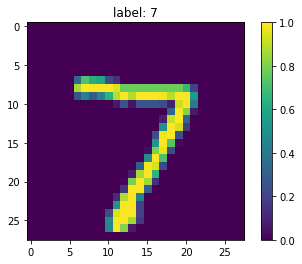

In [ ]:
predict_single_image_by_model(func_model, x_test[0])

# Subclass Model API

In [39]:
class CustomModel(tf.keras.models.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.flatten = Flatten()
    self.dense1 = Dense(256, 'relu')
    self.dense2 = Dense(10, 'softmax')
  
  def call(self, inputs):
    x = self.flatten(inputs)
    x = self.dense1(x)
    x = self.dense2(x)
    return x
  
  # used for summary or plot model
  def build_graph(self, shape):
    x = tf.keras.layers.Input(shape=shape)
    return tf.keras.models.Model(inputs=[x], outputs=self.call(x))

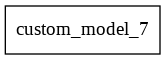

In [44]:
# load by class call
cus_model = CustomModel()
plot_model(cus_model, show_layer_names=True, show_shapes=True)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


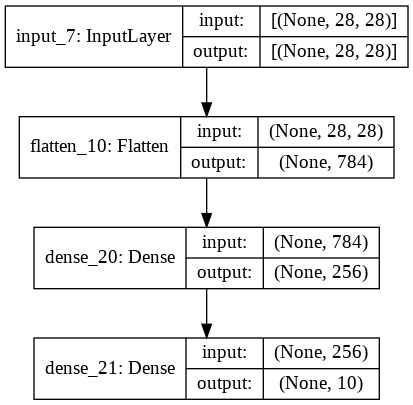

In [46]:
# sumamry

print(cus_model.build_graph((28, 28)).summary())

# to plot model 
plot_model(
    cus_model.build_graph((28, 28)),                      # here is the trick (for now)
    to_file='model.png', dpi=96,              # saving  
    show_shapes=True, show_layer_names=True,  # show shapes and layer name
    expand_nested=False                       # will show nested block
)


In [16]:
# load by sequential api
cus_model = tf.keras.models.Sequential([CustomModel()])
cus_model.build(input_shape=(None, 28, 28))
cus_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_model_3 (CustomModel) (None, 10)                203530    
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


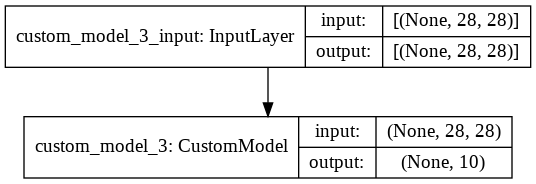

In [17]:
plot_model(cus_model, show_layer_names=True, show_shapes=True)

In [18]:
cus_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
cus_model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3810 - accuracy: 0.8891
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0954 - accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0612 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.009

In [21]:
cus_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0768 - accuracy: 0.9798


[0.07679231464862823, 0.9797999858856201]

In [22]:
cus_model.predict(x_test)

array([[2.43847009e-11, 1.58787425e-12, 4.40327508e-09, ...,
        9.99999881e-01, 5.83482429e-10, 2.69893849e-08],
       [6.18369342e-13, 6.01595551e-10, 1.00000000e+00, ...,
        5.71285343e-21, 2.73131295e-10, 1.69419433e-21],
       [7.12838566e-10, 9.99854565e-01, 8.61512599e-05, ...,
        3.18104321e-05, 2.18861896e-05, 3.30609939e-09],
       ...,
       [2.19889371e-19, 2.68131985e-15, 1.01160434e-19, ...,
        3.24939400e-08, 4.72436257e-11, 2.25117578e-08],
       [4.50386423e-16, 9.31596448e-19, 8.70273310e-19, ...,
        1.29453638e-14, 3.07860084e-08, 1.77336318e-19],
       [3.31486954e-14, 2.68488163e-15, 1.94105027e-11, ...,
        1.39672318e-16, 6.09932772e-14, 6.03931050e-16]], dtype=float32)

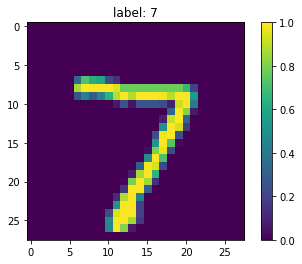

In [25]:
predict_single_image_by_model(cus_model, x_test[0])

# Classification Report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



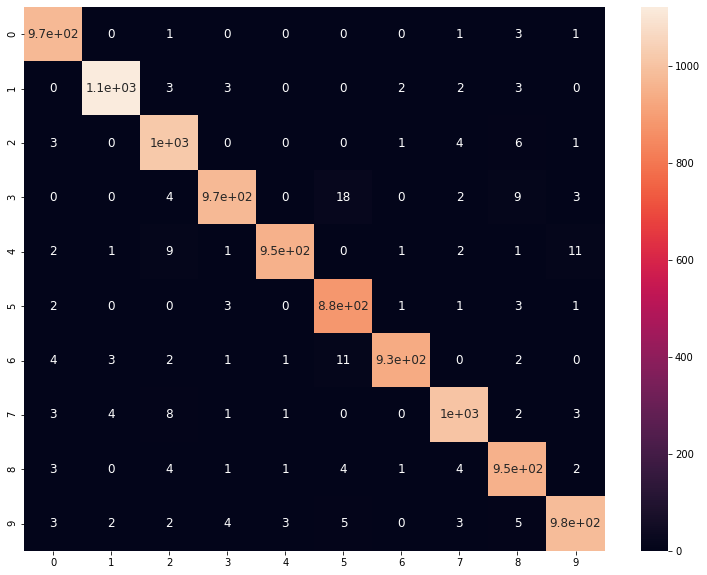

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_pred = cus_model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = [str(digit) for digit in range(10)]

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas  as pd

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
# print(cm)

cm = pd.DataFrame(cm, range(10),range(10))
plt.figure(figsize = (13,10))

sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()